<a href="https://colab.research.google.com/github/shivampip/NotDog/blob/master/MNIST_Fashion_%5BNormal_NN_vs_Conv_NN%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(X_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000,)


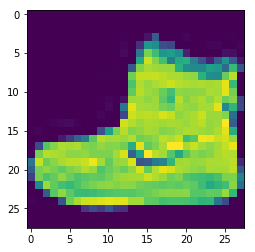

In [5]:
plt.imshow(X_train[0])

### Normalization

In [0]:
X_train= X_train/255.0
X_test= X_test/255.0

### Exploration

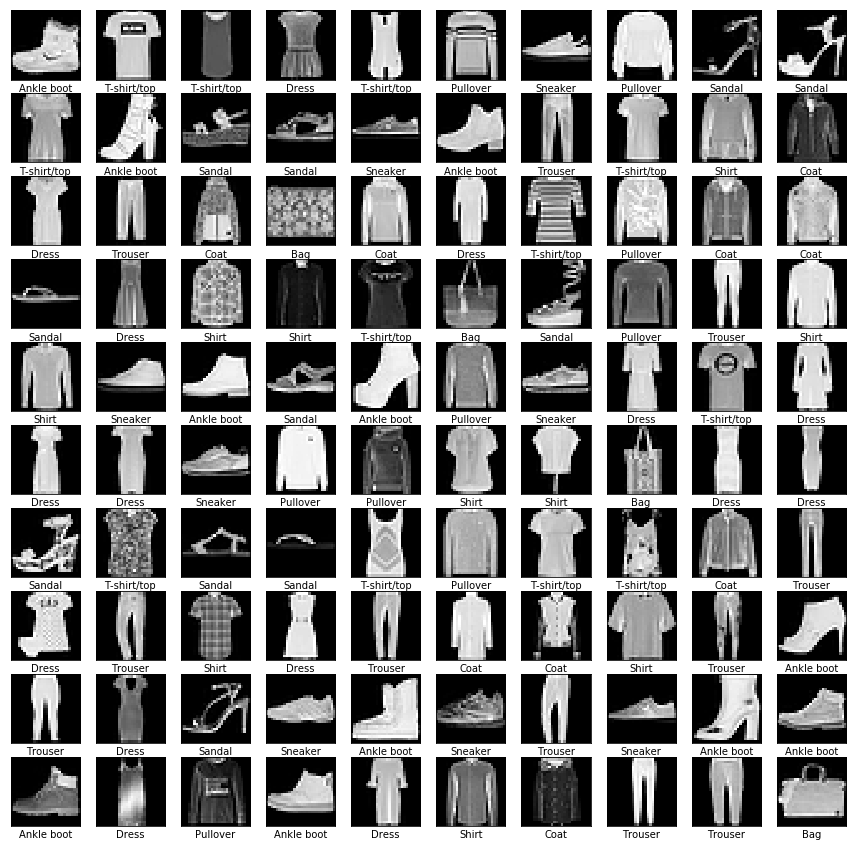

In [7]:
plt.figure(figsize=(15,15))
for i in range(1, 101):
    plt.subplot(10, 10, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i-1], cmap='gray')
    plt.xlabel(class_names[y_train[i-1]])
plt.show()

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

## Building The Model

### Simple NN

In [12]:
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation= 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation= 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= 'softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs= 10)

Epoch 1/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.5444 - acc: 0.8041
Epoch 2/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.4162 - acc: 0.8480
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3757 - acc: 0.8637
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3553 - acc: 0.8689
Epoch 5/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3379 - acc: 0.8760
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3260 - acc: 0.8807
Epoch 7/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3121 - acc: 0.8841
Epoch 8/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3058 - acc: 0.8872
Epoch 9/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2933 - acc: 0.8900
Epoch 10/10
60000/60000 [==============================] - 6s 97us/sample - loss:

In [16]:
test_loss, test_acc= model.evaluate(X_test, y_test)
print("Test accuracy: {:.2f}".format(test_acc))
print("Test loss:     {:.2f}".format(test_loss))

10000/10000 [==============================] - 1s 51us/sample - loss: 0.3449 - acc: 0.8761
Test accuracy: 0.88
Test loss:     0.34


### Convolution NN

In [0]:
input_layer= keras.layers.Input(shape= (28,28, 1))

x= keras.layers.Conv2D(12, 3, activation= 'relu')(input_layer)
x= keras.layers.MaxPool2D(2)(x)

x= keras.layers.Conv2D(24, 3, activation= 'relu')(x)
x= keras.layers.MaxPool2D(2)(x)

#x= keras.layers.Conv2D(48, 3, activation= 'relu')(x)
#x= keras.layers.MaxPool2D(2)(x)

x= keras.layers.Flatten()(x)
x= keras.layers.Dense(512, activation= 'relu')(x)
x= keras.layers.Dropout(0.2)(x)

#x= keras.layers.Dense(164, activation= 'relu')(x)
#x= keras.layers.Dropout(0.2)(x)

output= keras.layers.Dense(10, activation= 'softmax')(x)

In [0]:
model= keras.Model(input_layer, output)

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 12)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 24)        2616      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 24)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 600)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               307712    
__________

In [0]:
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

In [29]:
X_train.ndim

3

In [30]:
XX_train= np.expand_dims(X_train, axis=3)
XX_train.shape

(60000, 28, 28, 1)

In [31]:
model.fit(XX_train, y_train, epochs= 10)

Epoch 1/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.4931 - acc: 0.8206
Epoch 2/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3265 - acc: 0.8815
Epoch 3/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2841 - acc: 0.8952
Epoch 4/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2542 - acc: 0.9052
Epoch 5/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2290 - acc: 0.9142
Epoch 6/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2087 - acc: 0.9217
Epoch 7/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1912 - acc: 0.9280
Epoch 8/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1756 - acc: 0.9347
Epoch 9/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1599 - acc: 0.9408
Epoch 10/10
60000/60000 [==============================] - 7s 117us/sampl

In [32]:
XX_test= np.expand_dims(X_test, axis=3)
test_loss, test_acc= model.evaluate(XX_test, y_test)
print("Test accuracy: {:.2f}".format(test_acc))
print("Test loss:     {:.2f}".format(test_loss))

10000/10000 [==============================] - 1s 56us/sample - loss: 0.2904 - acc: 0.9072
Test accuracy: 0.91
Test loss:     0.29


## Observations

### Normal NN

* Accuracy: 0.88
* Total trainable params: 435k

### Convolution NN

* Accuracy: 0.91
* Total trainable params: 315k




## DONE